<a href="https://colab.research.google.com/github/jamslaugh/My-Datascience-Projects/blob/master/data_mining_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
Data Mining Project
</h1>

<h3>
Giacomo Matrone: P37000011 <br>
</h3>

# Botnet trial

In cyber security è fondamentale avere una risposta pronta e tempestiva agli attacchi informatici. Anche durante questo periodo delicato, quale quello sotteso dal *coronavirus*, vi è stato un incremento importante e marcato degli attacchi informatici, come mostrato nell'immagine seguente:

![alt_text](https://www.microsoft.com/security/blog/wp-content/uploads/2020/06/fig1f-trend-of-covid-19-themed-attacks.png)

Il problema principale, tuttavia, è che in un ambito cybersec abbiamo che l'ambiente di riferimento è dinamico e, contemporaneamente, gli exploit possono essere vari e differenti. Sopratutto, possono essere sconosciuti. L'approccio per signature e threshold fissi è, quindi, inaffidabile ad oggi.

L'obiettivo della nostra ricerca è identificare traffico malevolo su pattern di traffico.

In generale, un'entità malevola cerca di attuare questo tipo di kill chain, iniziando dalla recoinnessance:

![alt_text](https://www.exabeam.com/wp-content/uploads/2020/01/cyber_kill_chain.png)


### Ricognizione

Nella fase di ricognizione, l'attaccante prova a trovare quante più informazioni possibili sul target, tra cui: 

- Analisi DNS,
- Analisi WhoIs (IP lookup),
- Social Engineering
- ecc.

### Scanning

Nella fase di scanning si usano le informazioni ottenute nella ricognizione per approfondire le analisi effettuate. In questa fase, è possibile andare ad effettuare un'alisi della rete andando ad identificare gli endpoints e loro eventuali vulnerabilità.

### Gaining access

Nella terza fase avviene l'attacco vero e proprio. Il threat vector è quindi abbastanza avanzato qui. Attacchi tipici sono:

- DoS;
- SQL Injection;
- PhP Exploit;
- Buffer Overflow;
- Bruteforce;
- etc.

### Mantaining Access

In questa fase abbiamo che si mantiene l'accesso, potendo così scalare i privilegi al fine di guadagnare un ulteriore accesso a informazioni o risorse non pubbliche. Tipicamente si usano Trojan Horses, Back Doors,rootkits e via dicendo.

### Covering tracks

In questa fase si conclude il ciclo dell'attacco. L'attaccante fa in modo da cancellare ogni traccia presente sul server di un suo accesso non regolare, in modo da mantenere l'accesso al sistema per poi ricominciare le fasi d'attacco sui sistemi interni.

Più in generale, si rimanda alla ATT&CK Matrix presente qui:

![attack_matrix](https://anomali.cdn.rackfoundry.net/images/uploads/research/mitre-attck-navigator.png)

Questo file è stato creato al fine di poter vagliare alcune tecniche di AI in ambito cybersecurity. 

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBnTCcjUdfXOdNKziYJB4KcuntahlDQ-4f4jPVboMOW7a-nmeY)

## Abstract
 
Il nostro obiettivo consiste nell'identificare un modello che tenga conto se c'è un attacco in corso, per poi classificarlo come:

- Backdoor	
- DoS	
- Exploits	
- Fuzzers	
- Generic	
- Normal	
- Reconnaissance	
- Shellcode	
- Worms

Accuracy raggiunta tra il 97% ed il 98%
<br>
<br>

method | Accuracy Train | Accuracy Validation|Training Time per epoch(sec)
---|---|---|---|
ports as integer|0.9967|0.9966|320| 

In generale, abbiamo oltre 2 milioni di osservazioni, con un forte class imbalance.<br> Al momento, non è stata fatta alcuna feature engineering oltre quella relativa al one-hot encoding. Questo fa pensare che con un processo più esteso di feature engineering, sarà possibile arrivare ad avere un ulteriore miglioramento delle prestazioni.

Inoltre, abbiamo condotto il training tramite mini batch e cross-validation.

### Link al repo dati:

Al seguente [link](https://cloudstor.aarnet.edu.au/plus/index.php/s/2DhnLGDdEECo4ys) è possibile accedere al repository ufficiale dei dati.

## Data Download:

Il download dei dati comprende:

- Train set
- Test set
- 4 files (numerati 1 - 4) contenenti tutte le 2.5 milioni di osservazioni previste
- Files eventi ed accessori

# Download dati

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#!unzip 111554_267091_bundle_archive.zip

In [ ]:
#!ls ./drive/My\ Drive/research

In [ ]:
#!mv ./*.csv ./drive/My\ Drive/research

In [ ]:
!ls ./

drive  sample_data


In [ ]:
#!mkdir ./drive/My\ Drive/research
!cp ./drive/My\ Drive/research/*.csv ./

# Import pacchetti e prime analisi

In [ ]:
import os
import pandas as pd
import psutil
import humanize
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten,BatchNormalization,LSTM, Dense, Dropout, Conv2D, MaxPooling2D,Conv1D,MaxPooling1D,Input,Reshape, Add, Activation, ZeroPadding1D, AveragePooling1D, Embedding
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import glorot_uniform
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam,SGD,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import re
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import TruncatedSVD as tsvd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats as st
from tensorflow.keras.preprocessing.text import one_hot

# Prime analisi

In questo paragrafo analizziamo i dati dopo averli caricati.

In [ ]:
#!find . -name '*.csv.1*' -exec rm -f {} \;

## Caricamento dei dati



In [ ]:
pd.options.display.max_rows = 100000
pd.options.display.max_columns = 100000
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
files_data = [file for file in os.listdir() if file.endswith('.csv')]

In [ ]:
files_data

['UNSW-NB15_2.csv',
 'data_naive.csv',
 'UNSW-NB15_1.csv',
 'UNSW-NB15_4.csv',
 'UNSW_NB15_testing-set.csv',
 'data_embed.csv',
 'UNSW-NB15_LIST_EVENTS.csv',
 'NUSW-NB15_features.csv',
 'UNSW_NB15_training-set.csv',
 'UNSW-NB15_3.csv']

Analizziamo il file UNSW-NB15_4.csv tramite shell unix, in modo da poter visualizzare l'head dei dati.

In [ ]:
!head 'UNSW-NB15_4.csv'

59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,29,18,8,smtp,1459437.5,130766.8672,52,42,255,255,1422136554,3572668484,722,80,0,0,456.043567,15.530109,1424250009,1424250009,3.943843,4.912488,0.00059,0.000473,0.000117,0,0,,, ,2,2,7,4,1,1,3,,0
59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,29,2,370,http,26404.54492,1481982.875,364,746,255,255,389619597,394688654,53,1458,1,0,1031.366423,690.219581,1424250003,1424250009,16.155447,7.871279,0.000771,0.000638,0.000133,0,0,1,, ,3,1,4,4,1,1,1,,0
59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,29,0,0,dns,419841.8438,511861.9688,2,2,0,0,0,0,73,89,0,0,0,0,1424250009,1424250009,0.009,0.002,0,0,0,0,0,,, ,3,5,2,7,1,1,4,,0
59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,29,19,8,smtp,5503373.5,489360.125,54,42,255,255,4047523379,1903327524,700,80,0,0,65.909688,3.155258,1424250009,1424250009,1.011547,1.302561,0.000674,0.00054,0.000134,0,0,,, ,1,1,4,7,1,1,3,,0
59.166.0.8,45212,149.171.126.

### Carichiamo il file di descrizione delle features

In [ ]:
features = pd.read_csv('NUSW-NB15_features.csv',low_memory=False,encoding='latin1')

In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


### Carichiamo i dataset

Il dataset da noi considerato consta di 4 files differenti. Questi vengono dapprima caricati individualmente per poi andare ad essere uniti in un unico dataset generale (gen_df) sul quale lanciamo le analisi preliminari.

In [ ]:
first_df = pd.read_csv('UNSW-NB15_1.csv',names=features.Name,header = None,na_values=[" ",""],low_memory=False)
second_df = pd.read_csv('UNSW-NB15_2.csv',names=features.Name,header = None,na_values=[' ',""],low_memory=False)
third_df = pd.read_csv('UNSW-NB15_3.csv',names=features.Name,header = None,na_values=[' ',""],low_memory=False)
fourth_df = pd.read_csv('UNSW-NB15_4.csv',names=features.Name,header = None,na_values=[' ',""],low_memory=False)

In [ ]:
fourth_df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,29,18,8,smtp,1.459438e+06,1.307669e+05,52,42,255,255,1422136554,3572668484,722,80,0,0,456.043567,15.530109,1424250009,1424250009,3.943843,4.912488,0.000590,0.000473,0.000117,0,0,NaN,NaN,NaN,2,2,7,4,1,1,3,NaN,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,29,2,370,http,2.640454e+04,1.481983e+06,364,746,255,255,389619597,394688654,53,1458,1,0,1031.366423,690.219581,1424250003,1424250009,16.155447,7.871279,0.000771,0.000638,0.000133,0,0,1.0,NaN,NaN,3,1,4,4,1,1,1,NaN,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,29,0,0,dns,4.198418e+05,5.118620e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424250009,1424250009,0.009000,0.002000,0.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,3,5,2,7,1,1,4,NaN,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,29,19,8,smtp,5.503374e+06,4.893601e+05,54,42,255,255,4047523379,1903327524,700,80,0,0,65.909688,3.155258,1424250009,1424250009,1.011547,1.302561,0.000674,0.000540,0.000134,0,0,NaN,NaN,NaN,1,1,4,7,1,1,3,NaN,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,29,0,0,dns,6.128017e+05,7.471144e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424250009,1424250009,0.009000,0.004000,0.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,2,5,2,1,1,1,2,NaN,0


In [ ]:
gen_df = pd.DataFrame()
for el in [first_df,second_df,third_df,fourth_df]:
    gen_df = pd.concat([gen_df,el],axis=0)

Dopo aver caricato il dataset, possiamo osservare che abbiamo sette colonne con dtype object ed il resto di tipo numerico.

Quelle con dtype object sono:

- srcip 	
- sport 	
- dstip 	
- dsport 	
- proto 	
- state
- service

In [ ]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540047 entries, 0 to 440043
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit           

Analizziamo la forma del dataframe e, successivamente, andiamo ad analizzare le label uniche presenti. In modo piuttosto banale, possiamo constatare che le label sono solo 0 o 1.

In [ ]:
gen_df.shape

(2540047, 49)

In [ ]:
gen_df.Label.unique()

array([0, 1])

## Pulizia della label di attacco

Nelle label di attacco vi sono varie irregolarità:

- Nomi seguiti o preceduti da spazi non necessari;
- Nomi ripetuti al plurale (Backdoors -> Backdoor);
- Presenza di NaN nel tipo di attacco, stante ad indicare la presenza di traffico normale. D'altro canto, dalla prassi quotidiana si evince che una buona parte degli incident segnalati dagli attuali sistemi a signature siano il frutto di falsi positivi. Queste attività vanno spesso a gravare ulteriormente sugli analisti.

Andiamo a pulire i nostri elementi:

In [ ]:
gen_df.attack_cat.unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [ ]:
gen_df.attack_cat.str.strip().unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       'Fuzzers', 'Worms', 'Backdoors', 'Analysis', 'Backdoor'],
      dtype=object)

Sostituiamo qui anche gli NaN, concatenando le osservazioni di prima in un'unica soluzione:

In [ ]:
gen_df.attack_cat = gen_df.attack_cat.str.strip().str.replace("Backdoors","Backdoor").fillna("Normal")

# Preprocessing e NaN hunting:

La fase di preprocessing è un aspetto fondamentale del Data Mining, poichè fondamentale nelle fasi successive, tra cui il KDD e il modelling. 

In [ ]:
#sns.heatmap(gen_df.isna())

In [ ]:
gen_df[gen_df.proto=='unas'].head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
84914,175.45.176.1,0,149.171.126.12,0,unas,INT,0.000035,200,0,254,0,0,0,-,80000000.0,0.0,2,0,0,0,0,0,100,0,0,0,0.0,0.0,1421930724,1421930724,0.01,0.0,0.0,0.0,0.0,0,2,0.0,0.0,0.0,12,12,6,6,6,6,6,Analysis,1
84915,175.45.176.1,0,149.171.126.12,0,unas,INT,0.000035,200,0,254,0,0,0,-,80000000.0,0.0,2,0,0,0,0,0,100,0,0,0,0.0,0.0,1421930724,1421930724,0.01,0.0,0.0,0.0,0.0,0,2,0.0,0.0,0.0,12,12,6,6,6,6,6,Backdoor,1
84916,175.45.176.1,0,149.171.126.12,0,unas,INT,0.000035,200,0,254,0,0,0,-,80000000.0,0.0,2,0,0,0,0,0,100,0,0,0,0.0,0.0,1421930724,1421930724,0.01,0.0,0.0,0.0,0.0,0,2,0.0,0.0,0.0,12,12,6,6,6,6,6,Exploits,1
84917,175.45.176.1,0,149.171.126.12,0,unas,INT,0.000035,200,0,254,0,0,0,-,80000000.0,0.0,2,0,0,0,0,0,100,0,0,0,0.0,0.0,1421930724,1421930724,0.01,0.0,0.0,0.0,0.0,0,2,0.0,0.0,0.0,12,12,6,6,6,6,6,DoS,1
84918,175.45.176.1,0,149.171.126.12,0,unas,INT,0.000035,200,0,254,0,0,0,-,80000000.0,0.0,2,0,0,0,0,0,100,0,0,0,0.0,0.0,1421930724,1421930724,0.01,0.0,0.0,0.0,0.0,0,2,0.0,0.0,0.0,12,12,6,6,6,6,6,Exploits,1


In [ ]:
def df_shape(df):
  for d in df.columns:
    print('{} has missing values:\n{}%\n##############################\n'.format(d,df.loc[:,d].isna().sum()/df.shape[0]))

In [ ]:
df_shape(gen_df)

srcip has missing values:
0.0%
##############################

sport has missing values:
0.0%
##############################

dstip has missing values:
0.0%
##############################

dsport has missing values:
0.0%
##############################

proto has missing values:
0.0%
##############################

state has missing values:
0.0%
##############################

dur has missing values:
0.0%
##############################

sbytes has missing values:
0.0%
##############################

dbytes has missing values:
0.0%
##############################

sttl has missing values:
0.0%
##############################

dttl has missing values:
0.0%
##############################

sloss has missing values:
0.0%
##############################

dloss has missing values:
0.0%
##############################

service has missing values:
0.0%
##############################

Sload has missing values:
0.0%
##############################

Dload has missing values:
0.0%
#######################

In [ ]:
gen_df[gen_df.ct_flw_http_mthd.isnull()]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
387202,149.171.126.14,179,175.45.176.3,33159,tcp,FIN,0.121478,258,172,252,254,0,0,-,14158.942380,8495.365234,6,4,255,255,621772692,2202533631,43,43,0,0,30.177547,11.830604,1424219008,1424219008,24.295600,8.375000,0.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,1,1,1,1,1,1,1,Normal,0
387203,175.45.176.3,22592,149.171.126.16,143,tcp,FIN,0.649902,734,42014,62,252,2,17,-,8395.112305,503571.312500,14,38,255,255,1417884146,3077387971,52,1106,0,0,61.426934,1387.778330,1424219008,1424219008,49.915000,15.432865,0.000000,0.000000,0.000000,0,1,NaN,NaN,NaN,43,6,1,1,1,1,2,Normal,0
387204,175.45.176.0,62762,149.171.126.16,56430,tcp,FIN,1.623129,364,13186,62,252,1,6,-,1572.271851,60929.230470,8,16,255,255,2116150707,2963114973,46,824,0,0,17179.586860,11420.926230,1424219008,1424219009,231.875571,102.737203,0.111897,0.061458,0.050439,0,1,NaN,NaN,NaN,7,6,2,2,1,1,3,Normal,0
387205,175.45.176.0,45235,149.171.126.16,21,tcp,FIN,1.681642,628,770,62,252,1,3,ftp,2740.178955,3358.622070,12,12,255,255,1107119177,1047442890,52,64,0,0,259.080172,4991.784669,1424219008,1424219009,152.876547,90.235726,0.000000,0.000000,0.000000,0,1,NaN,1.0,1.0,1,1,2,2,1,1,3,Normal,0
387206,175.45.176.3,62994,149.171.126.14,179,tcp,FIN,0.449454,534,268,254,252,2,1,-,8561.499023,3987.059814,10,6,255,255,2436137549,1977154190,53,45,0,0,2415.837634,115.807000,1424219009,1424219009,47.750333,75.659602,0.128381,0.071147,0.057234,0,1,NaN,NaN,NaN,43,39,2,2,2,1,40,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440037,59.166.0.9,61886,149.171.126.1,21,tcp,CON,3.108071,1148,1402,31,29,5,6,ftp,2808.172607,3428.492920,20,20,255,255,2715113295,657712141,57,70,0,0,13373.607040,294.102000,1424262066,1424262069,161.833317,163.554891,0.000676,0.000525,0.000151,0,0,NaN,2.0,2.0,2,2,2,4,2,2,3,Normal,0
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671880,146610.765600,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,NaN,NaN,NaN,1,2,3,3,1,1,3,Normal,0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,255,1529727621,185369967,57,58,0,0,3961.093354,129.038367,1424262068,1424262069,51.976999,72.915602,0.000609,0.000477,0.000132,0,0,NaN,2.0,2.0,2,2,2,2,2,2,2,Normal,0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,255,497208793,889904111,56,70,0,0,13233.728560,379.052750,1424262062,1424262069,204.359814,214.372375,0.000617,0.000485,0.000132,0,0,NaN,2.0,2.0,2,2,4,2,2,2,2,Normal,0


## Preprocessing:

Com'è possibile notare, abbiamo le seguenti discrepanze:

- Vi sono due variabili, ovvero is_ftp_login e ct_flw_http_mthd che hanno NaN perchè alcuni pacchetti registrati non hanno avuto alcun tipo di flusso http o di login ftp.
- srcport e dsport presentano entrambi dei numeri esadecimali non correttamente convertiti da pandas, come:
    - sport ha '0x000b'
    - dsport ha '0xc0a8'

In [ ]:
display(gen_df.ct_ftp_cmd.unique())
display(gen_df.ct_flw_http_mthd.unique())

array([ 0.,  1.,  6.,  2.,  4.,  8.,  5.,  3., nan])

array([ 0.,  1.,  2.,  4., 14.,  8.,  6., 12., 10.,  3.,  5., 36.,  9.,
       nan, 16., 25., 30.])

In [ ]:
#df_train = pd.read_csv(files_data[files_data.index('UNSW_NB15_training-set.csv')])
#df_test = pd.read_csv(files_data[files_data.index('UNSW_NB15_testing-set.csv')])

Andiamo a correggere srcport e dsport, castandoli come int, al fine di effettuare le dovute operazioni che sono appresso definite.

1. Creiamo un subset dei dati in modo da avere le parti di source port e destination port contenenti almeno una lettera.

In [ ]:
hex_dsports = gen_df[gen_df.dsport.str.contains('[x]+')]

In [ ]:
hex_dsports

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
222,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1780,0,64,0,0,0,-,1.964095e+02,0.0,5,0,0,0,0,0,356,0,0,0,4030.700750,0.0,1421927381,1421927439,14500.316,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
2768,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1424,0,64,0,0,0,-,1.898649e+02,0.0,4,0,0,0,0,0,356,0,0,0,4899.254000,0.0,1421927452,1421927497,15000.144,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
4205,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1780,0,64,0,0,0,-,2.589124e+02,0.0,5,0,0,0,0,0,356,0,0,0,5913.311000,0.0,1421927517,1421927561,12800.040,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
5611,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1424,0,64,0,0,0,-,2.034262e+02,0.0,4,0,0,0,0,0,356,0,0,0,3570.406750,0.0,1421927581,1421927623,15500.057,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
7406,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1424,0,64,0,0,0,-,1.448154e+02,0.0,4,0,0,0,0,0,356,0,0,0,865.436312,0.0,1421927642,1421927701,19499.748,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
9018,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1780,0,64,0,0,0,-,2.278429e+02,0.0,5,0,0,0,0,0,356,0,0,0,5172.168000,0.0,1421927722,1421927772,12499.843,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
10716,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1780,0,64,0,0,0,-,2.071260e+02,0.0,5,0,0,0,0,0,356,0,0,0,2277.617000,0.0,1421927789,1421927844,13750.082,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
12192,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,2136,0,64,0,0,0,-,2.498233e+02,0.0,6,0,0,0,0,0,356,0,0,0,3144.937000,0.0,1421927851,1421927908,10666.528,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
13916,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1424,0,64,0,0,0,-,1.553474e+02,0.0,4,0,0,0,0,0,356,0,0,0,5024.592000,0.0,1421927915,1421927970,15500.061,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
15851,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,2136,0,64,0,0,0,-,2.455162e+02,0.0,6,0,0,0,0,0,356,0,0,0,2795.142500,0.0,1421927977,1421928035,10833.361,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0


In [ ]:
hex_sports = gen_df[gen_df.sport.str.contains('[a-z]+').fillna(False)]

2. analizziamo le relazioni tra porto sorgente e porto destinazione, per verificare che nelle 300 osservazioni di hex_ports vi siano anomalie

In [ ]:
hex_dsports.dsport.value_counts()

0xcc09        241
0xc0a8         54
0x20205321      2
Name: dsport, dtype: int64

In [ ]:
hex_sports.sport.value_counts()

0x000c    4
0x000b    2
Name: sport, dtype: int64

3. A questo punto, possiamo intraprendere due strade: la prima, che prevede la conversione da hex a decimali, mentre la seconda prevede il drop delle righe recanti questo tipo di dato.

In [ ]:
b16 = lambda x: int(x,16)
hex_dsports.dsport = hex_dsports.loc[:,"dsport"].apply(b16)
hex_sports.sport = hex_sports.loc[:,"sport"].apply(b16)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


4. Andiamo a questo punto a sostituire le righe, per evitare duplicati rispetto a quelli che andiamo a mettere

In [ ]:
gen_df.drop(hex_dsports.index,inplace=True)
gen_df.drop(hex_sports.index,inplace=True)


In [ ]:
hex_dsports.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
222,192.168.241.243,49320,192.168.241.243,49320,icmp,URH,0.0,1780,0,64,0,0,0,-,196.409500,0.0,5,0,0,0,0,0,356,0,0,0,4030.700750,0.0,1421927381,1421927439,14500.316,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
2768,192.168.241.243,49320,192.168.241.243,49320,icmp,URH,0.0,1424,0,64,0,0,0,-,189.864853,0.0,4,0,0,0,0,0,356,0,0,0,4899.254000,0.0,1421927452,1421927497,15000.144,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
4205,192.168.241.243,49320,192.168.241.243,49320,icmp,URH,0.0,1780,0,64,0,0,0,-,258.912415,0.0,5,0,0,0,0,0,356,0,0,0,5913.311000,0.0,1421927517,1421927561,12800.040,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
5611,192.168.241.243,49320,192.168.241.243,49320,icmp,URH,0.0,1424,0,64,0,0,0,-,203.426239,0.0,4,0,0,0,0,0,356,0,0,0,3570.406750,0.0,1421927581,1421927623,15500.057,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0
7406,192.168.241.243,49320,192.168.241.243,49320,icmp,URH,0.0,1424,0,64,0,0,0,-,144.815430,0.0,4,0,0,0,0,0,356,0,0,0,865.436312,0.0,1421927642,1421927701,19499.748,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,1,2,Normal,0


5. Andiamo ad unire le righe al fine di ripulire ulteriormente i dati. Questo ci serve al fine di poter togliere valori anomali.

In [ ]:
gen_df = pd.concat([gen_df,hex_dsports[hex_dsports.dsport<65535]])
gen_df = pd.concat([gen_df,hex_sports])

6. Proviamo a convertire le variabili in integer type

Da notare che sport e dsport hanno un `'-'` nei dati. La strategia che seguiamo è 
7. Togliere il `-` ed inserire un NaN.

In [ ]:
gen_df.dsport = gen_df.dsport.replace({'-':np.nan})
gen_df.sport = gen_df.sport.replace({'-':np.nan})

8. np.nan è un floating object, quindi castiamo type 'float' sulle due colonne:

In [ ]:
gen_df.dsport = gen_df.dsport.astype('float')
gen_df.sport = gen_df.sport.astype('float')

Il dataset contiene anche differenti pacchetti ICMP che sono stati droppati, come visibile di seguito. Questi pacchetti li possiamo codificare con `-1`

In [ ]:
gen_df[gen_df.dsport.isnull()]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
45816,175.45.176.3,768.0,149.171.126.19,NaN,icmp,URN,0.0,120,0,255,0,0,0,-,2.191031e+05,0.0,3,0,0,0,0,0,40,0,0,0,1.4565,0.0,1421929211,1421929211,1.46050,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,6,4,4,4,2,2,4,Normal,0
45818,175.45.176.3,256.0,149.171.126.19,NaN,icmp,no,0.0,28,0,254,0,0,0,-,0.000000e+00,0.0,1,0,0,0,0,0,28,0,0,0,0.0000,0.0,1421929211,1421929211,0.00000,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,6,4,4,4,2,2,4,Normal,0
72914,175.45.176.3,4352.0,149.171.126.13,NaN,icmp,MAS,0.0,78,0,254,0,0,0,-,2.836364e+07,0.0,2,0,0,0,0,0,39,0,0,0,0.0000,0.0,1421930319,1421930319,0.01100,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,2,2,Normal,0
139328,175.45.176.1,3328.0,149.171.126.10,NaN,icmp,TST,0.0,86,0,254,0,0,0,-,3.127273e+07,0.0,2,0,0,0,0,0,43,0,0,0,0.0000,0.0,1421932579,1421932579,0.01100,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,3,2,2,9,1,2,2,Normal,0
36372,10.40.85.1,11.0,175.45.176.2,NaN,icmp,TXD,0.0,264,0,64,0,0,0,-,1.248172e+04,0.0,3,0,0,0,0,0,88,0,0,0,16.4055,0.0,1421928800,1421928800,56.40250,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,2,2,Normal,0
47316,10.40.85.1,12.0,175.45.176.3,NaN,icmp,PAR,0.0,147,0,64,0,0,0,-,0.000000e+00,0.0,1,0,0,0,0,0,147,0,0,0,0.0000,0.0,1421929277,1421929277,0.00000,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,2,2,Normal,0
116472,10.40.85.1,12.0,175.45.176.2,NaN,icmp,PAR,0.0,2800,0,64,0,0,0,-,1.041973e+03,0.0,20,0,0,0,0,0,140,0,0,0,222.7920,0.0,1421931785,1421931805,1074.88375,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,1,2,2,Normal,0


In [ ]:
gen_df.dsport = gen_df.dsport.fillna(-1)

L'unico missing in sport è quello inerente un pacchetto icmp, pertanto gli daremo un fill con `0`

In [ ]:
display(gen_df[gen_df.sport.isnull()])
gen_df.sport = gen_df.sport.fillna(0)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
143351,149.171.126.19,NaN,175.45.176.1,48879.0,icmp,ECR,0.0,0,156,0,254,0,0,-,56727272.0,0.0,0,2,0,0,0,0,0,78,0,0,0.0,0.0,1421932729,1421932729,0.0,0.011,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,2,2,2,2,1,2,Normal,0


## Working on data:

Dopo aver ripulito i dati, lavoriamo sugli stessi

In [ ]:
data = gen_df.drop_duplicates(keep='first')

In [ ]:
print(data.shape)
print(gen_df.shape)

(2058768, 49)
(2539218, 49)


In [ ]:
data.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390.0,149.171.126.6,53.0,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,33661.0,149.171.126.9,1024.0,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,1464.0,149.171.126.7,53.0,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,3593.0,149.171.126.5,53.0,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,49664.0,149.171.126.0,53.0,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,7,9,1,1,1,1,1,Normal,0


In [ ]:
data.describe()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,1.125404e+06,1.044860e+06,1.044860e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06,2.058768e+06
mean,3.235667e+04,1.352940e+04,6.510941e-01,5.098247e+03,4.192533e+04,4.359687e+01,3.650219e+01,6.113914e+00,1.893101e+01,9.068219e+06,2.954198e+06,3.864545e+01,4.977891e+01,1.793928e+02,1.790197e+02,1.508624e+09,1.508379e+09,1.300077e+02,3.301831e+02,9.867698e-02,5.158123e+03,1.646466e+03,8.413137e+02,1.423103e+09,1.423103e+09,1.600706e+02,6.713429e+01,7.231919e-03,3.850072e-03,3.381847e-03,1.331379e-03,1.041011e-01,2.174712e-01,3.824149e-02,4.027525e-02,5.405759e+00,5.159105e+00,3.672229e+00,4.164976e+00,1.619826e+00,1.252098e+00,2.651410e+00,4.839399e-02
std,1.935059e+04,1.945832e+04,1.104556e+01,6.214682e+04,1.698526e+05,5.052408e+01,4.370606e+01,2.458088e+01,5.952472e+01,7.364517e+07,4.480301e+06,8.047632e+01,1.272024e+02,1.164611e+02,1.166269e+02,1.430377e+09,1.430227e+09,1.646464e+02,3.397252e+02,3.783491e-01,5.236793e+04,1.356279e+04,3.250125e+03,1.145960e+06,1.145960e+06,2.494285e+03,1.280455e+03,5.043724e-02,2.836013e-02,2.621172e-02,3.646377e-02,4.480674e-01,6.579780e-01,1.945042e-01,2.190757e-01,5.188179e+00,5.004339e+00,3.261353e+00,3.600238e+00,2.658315e+00,1.753308e+00,4.141976e+00,2.145974e-01
min,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421927e+09,1.421927e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.542700e+04,5.300000e+01,3.591000e-03,4.240000e+02,3.040000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,8.077178e+04,7.632172e+04,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.200000e+01,8.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.207920e-01,1.421949e+09,1.421949e+09,2.734290e-01,2.288260e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,3.253300e+04,1.723000e+03,2.641600e-02,1.684000e+03,3.080000e+03,3.100000e+01,2.900000e+01,4.000000e+00,5.000000e+00,5.407408e+05,6.691729e+05,1.600000e+01,1.800000e+01,2.550000e+02,2.550000e+02,1.237060e+09,1.236710e+09,7.300000e+01,1.170000e+02,0.000000e+00,0.000000e+00,3.140672e+01,1.882153e+01,1.424220e+09,1.424220e+09,7.543330e-01,7.021445e-01,6.460000e-04,5.120000e-04,1.270000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,4.893325e+04,2.359800e+04,3.341865e-01,3.728000e+03,1.991800e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.500000e+01,1.095752e+06,3.835397e+06,4.800000e+01,4.600000e+01,2.550000e+02,2.550000e+02,2.768066e+09,2.766836e+09,1.280000e+02,5.650000e+0

## Studio delle variabili

Al fine di poter studiare le variabili, dobbiamo capire il significato delle features che abbiamo in analisi. Quindi, avremo quanto segue:

In [ ]:
obj_col=data.select_dtypes('object').columns.tolist()
pd.options.display.max_colwidth = 1000
pd.concat([data.nunique().rename('#_uniques'),
           data.dtypes.rename('types')],
          axis=1).reset_index().merge(features[['Name',
                                                'Description']], 
                                      left_on='index', 
                                      right_on='Name')

,index,#_uniques,types,Name,Description
0,srcip,43,object,srcip,Source IP address
1,sport,64599,float64,sport,Source port number
2,dstip,47,object,dstip,Destination IP address
3,dsport,64627,float64,dsport,Destination port number
4,proto,134,object,proto,Transaction protocol
5,state,16,object,state,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)"
6,dur,587185,float64,dur,Record total duration
7,sbytes,14152,int64,sbytes,Source to destination transaction bytes
8,dbytes,19165,int64,dbytes,Destination to source transaction bytes
9,sttl,13,int64,sttl,Source to destination time to live value


Andiamo a verificare il numero degli NA presenti nel dataset

In [ ]:
data.apply(lambda x: x.isna().sum())

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

In [ ]:
data.service.unique()

array(['dns', '-', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3',
       'snmp', 'ssl', 'irc', 'radius', 'dhcp'], dtype=object)

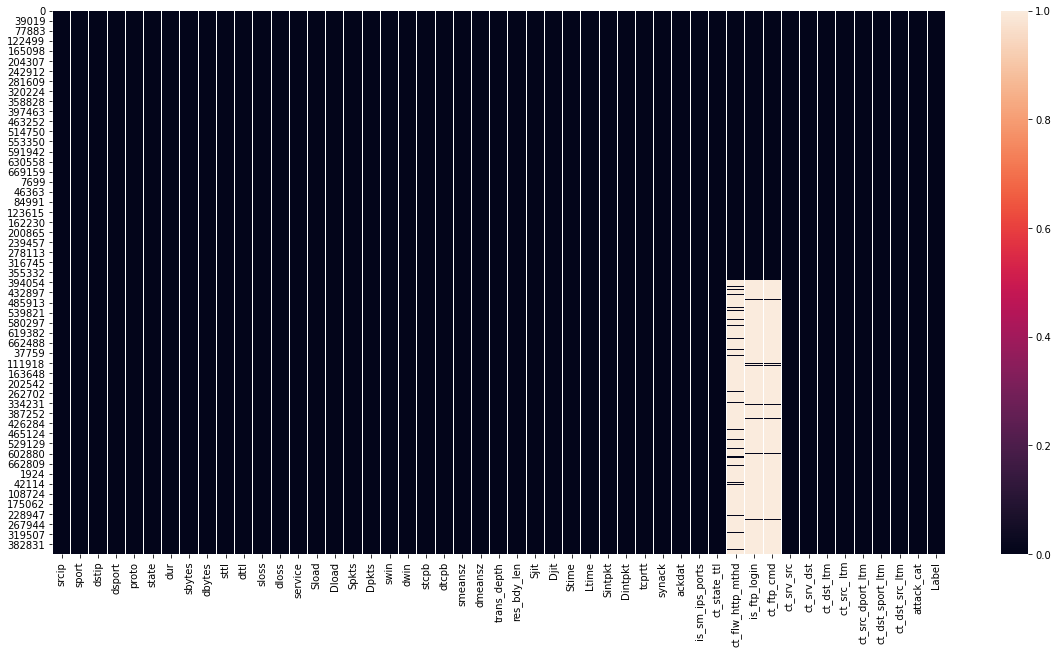

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(data.isna())
plt.show()

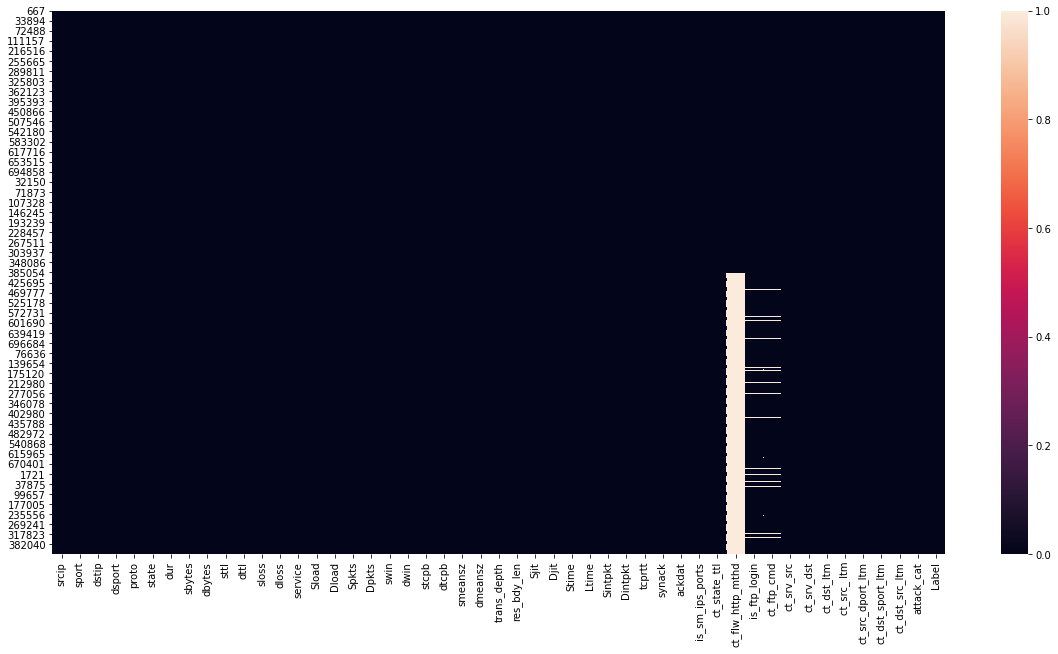

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(data.loc[data.service=='ftp'].isna())
plt.show()

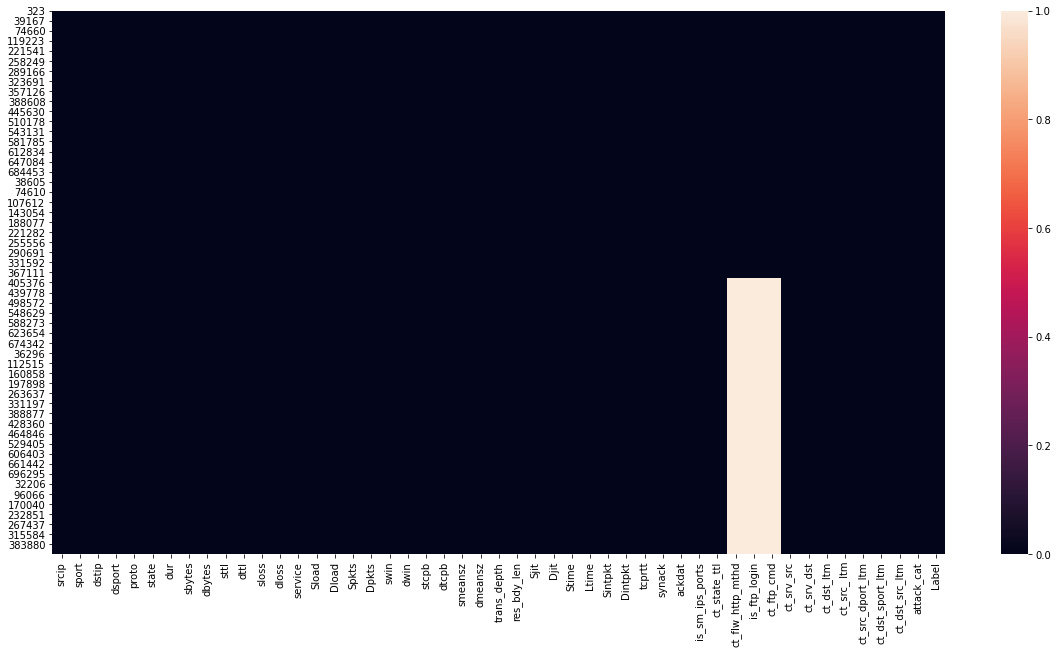

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(data.loc[data.service=='ftp-data'].isna())
plt.show()

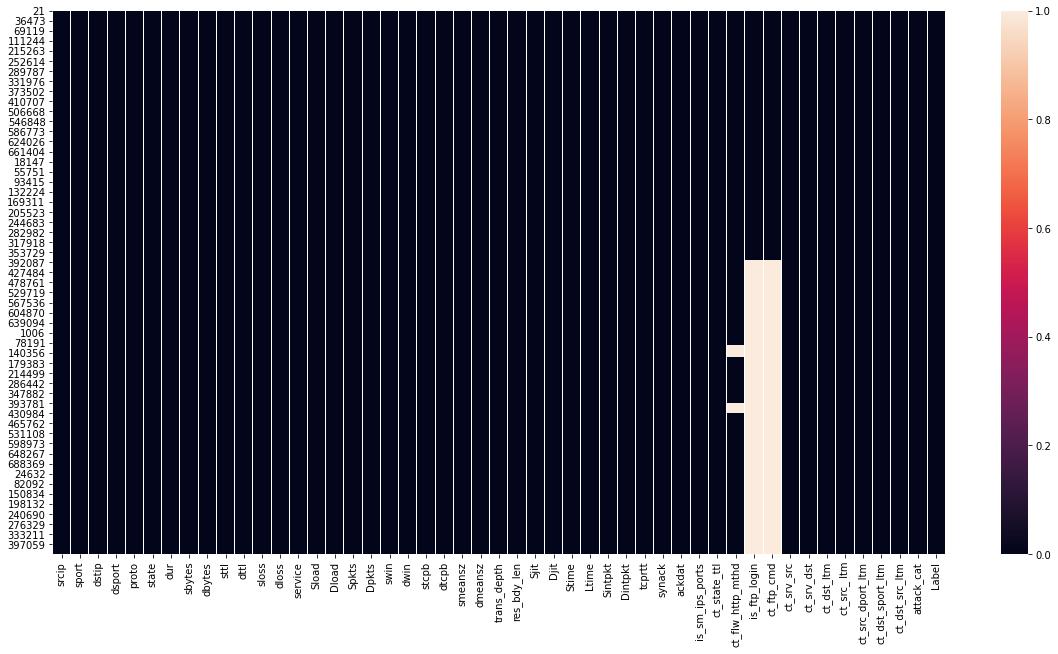

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(data.loc[data.service=='http'].isna())
plt.show()

## NA sostituzione
A questo punto, non ci restano che tre colonne con NaN. Una è relativa al flag di login ftp, un'altra al flag di controllo ftp ed, infine, un'altra inerente al controllo flussi http.

Essendo tutte le classi numeriche, andiamo ad identificare con -1 eventuali NaN presenti nelle colonne definite sopra. 

In [ ]:
data.loc[:,"ct_flw_http_mthd"] = data.loc[:,"ct_flw_http_mthd"].fillna(-1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
data.loc[:,"is_ftp_login"] = data.loc[:,"is_ftp_login"].fillna(-1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
data.loc[:,"ct_ftp_cmd"] = data.loc[:,"ct_ftp_cmd"].fillna(-1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058768 entries, 0 to 116473
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             float64
 2   dstip             object 
 3   dsport            float64
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit           

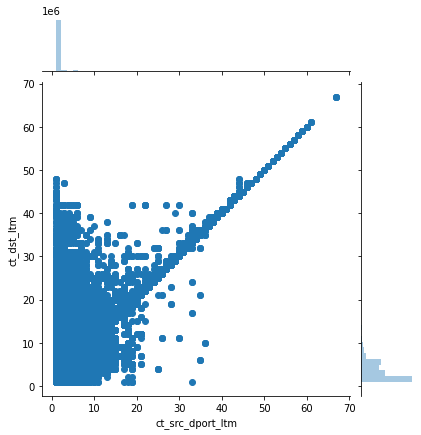

In [ ]:
sns.jointplot(data.ct_src_dport_ltm,data.ct_dst_ltm)

In [ ]:
sns.pairplot(data,hue='Label')

# Ideas

## Idea 1
I port sono categorici, però li si può dividere tra porte well known, porte registered e dynamic ports. Questo ha un livello di dettaglio inferiore, anche se permette di ridurre di parecchio la c.d. curse of dimensionality.

Abbiamo, quindi, port well known [0 - 1024), dynamic [1024 - 49151), registered [49151 - 65535].

Inoltre, possiamo ulteriormente indagare le porte a seconda che si tratti di ssh (22), ssl/tls ports, che sono: 
- 261, 
- 443, 
- 448,
- 465,
- 563,
- 586,
- 614,
- 636,
- 989,
- 992,
- 993,
- 994,
- 995

Di norma, queste porte sono quelle contattate per fare exfiltration di dati in modo criptato, sicchè non rilevabile da firewall o IDS a meno che non vi sia impostata una regola specifica.

Altre informazioni sono reperibili sulla [MiTRE ATT&CK Matrix](https://attack.mitre.org/)

Inoltre, una buona parte delle comunicazioni con i C&C avvengono spesso su porte comunemente usate.

## Idea 2
I port possono essere tranquillamente codificati in one-hot. In questo caso abbiamo, tuttavia, un vettore molto più largo in risposta, andando ad essere le porte coperte in quasi tutto il loro range sia in source che in destination.

## Idea 3

I port possono essere preprocessati tramite embeddings, assieme alle altre variabili di classe object.

Per il momento, andiamo a considerare i port come quantità intere e continue, per semplicità di elaborazione. 

Andiamo quindi a creare il dovuto preprocessing, per poi poter creare un punto di checkpoint dal quale andare a studiare i dati.

In [ ]:
data.loc[:,"sport"] = data.sport.astype('int').apply(str)
data.loc[:,"dsport"] = data.dsport.astype('int').apply(str)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Data writing

Andiamo, nell'ordine, a rendere i porti sorgente e destinazione come dtypes integer. Creiamo one-hot encoding sulle variabili continue ed, infine, andiamo a

In [ ]:
data[['sport','dsport']] = data.loc[:,['sport','dsport']].astype('int')
data.info()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058768 entries, 0 to 116473
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             int64  
 2   dstip             object 
 3   dsport            int64  
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit           

In [ ]:
data_dum = pd.get_dummies(data.select_dtypes(include='object'))

In [ ]:
data_naive = pd.concat([data.select_dtypes(exclude='object'),data_dum],axis=1)

In [ ]:
del gen_df

In [ ]:
data_naive.to_csv("data_naive.csv",index=False)

In [ ]:
del data_naive

Copiamo i dati dalla cartella locale a quella di google drive.

In [ ]:
!cp data_naive.csv ./drive/My\ Drive/research

# checkpoint

## Import pacchetti, se necessario:



In [ ]:
import os
import pandas as pd
import psutil
import humanize
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten,BatchNormalization,LSTM, Dense, Dropout,Conv1D,MaxPooling1D,Input,Reshape, Add, Activation, ZeroPadding1D, AveragePooling1D, Embedding
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import glorot_uniform
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam,SGD,Adadelta,RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import re
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import TruncatedSVD as tsvd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, multilabel_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats as st
from tensorflow.keras.preprocessing.text import one_hot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Caricamento dati

Ricarichiamo dal Checkpoint. Attualmente dobbiamo metter su data_naive.csv, il file copiato in precedenza.

In [ ]:
!cp ./drive/My\ Drive/research/data_naive.csv ./

In [ ]:
data = pd.read_csv('data_naive.csv')

Dall'head è possibile notare che ci sono alcune variabili che hanno un prefisso attack. Queste sono le nostre label di attacco. Andiamo, quindi, a selezionare queste variabili al fine di avere le label di attacco.

In [ ]:
data.head()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,...,proto_zero,state_ACC,state_CLO,state_CON,state_ECO,state_ECR,state_FIN,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1390,53,0.001055,132,164,31,29,0,0,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,3,7,1,3,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,33661,1024,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,4,2,3,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1464,53,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,12,8,1,2,2,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3593,53,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,6,9,1,1,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,49664,53,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,7,9,1,1,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Selezioniamo, quindi, le nostre label di attacco:

In [ ]:
y = data[[el for el in data.columns if el.startswith('attack_cat')]]

## Splitting e Scaling dei dati

Per facilitare la convergenza, andiamo a scalare i dati. Visto che non possiamo assumere, dall'analisi descrittiva effettuata, che i dati siano normo distribuiti, andiamo di Min Max Scaling.

Lo splitting avviene nella misura del 10% tra train e test, stratificando per il nostro target

In [ ]:
ssc = MinMaxScaler()
X = ssc.fit_transform(data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size = 0.1)

In [ ]:
del data

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
print(y_train.sum(axis=0))
print(y_test.sum(axis=0))

attack_cat_Analysis             1966
attack_cat_Backdoor             1784
attack_cat_DoS                  5098
attack_cat_Exploits            24837
attack_cat_Fuzzers             19615
attack_cat_Generic             22838
attack_cat_Normal            1763222
attack_cat_Reconnaissance      12017
attack_cat_Shellcode            1360
attack_cat_Worms                 154
dtype: int64
attack_cat_Analysis             218
attack_cat_Backdoor             198
attack_cat_DoS                  566
attack_cat_Exploits            2760
attack_cat_Fuzzers             2180
attack_cat_Generic             2538
attack_cat_Normal            195914
attack_cat_Reconnaissance      1335
attack_cat_Shellcode            151
attack_cat_Worms                 17
dtype: int64


In [ ]:
y.sum(axis=0)

attack_cat_Analysis             2184
attack_cat_Backdoor             1982
attack_cat_DoS                  5664
attack_cat_Exploits            27597
attack_cat_Fuzzers             21795
attack_cat_Generic             25376
attack_cat_Normal            1959136
attack_cat_Reconnaissance      13352
attack_cat_Shellcode            1511
attack_cat_Worms                 171
dtype: int64

# Primo network

La nostra rete neurale consta di una Resnet 50 attuata tramite convoluzione mono dimensionale. Questo tipo di architettura comprende circa 200 layers e permette di lavorare con reti neurali espanse, che riescono a cattuare features complesse ed astratte dai dati, permettendo di evitare il problema del gradient vanishing o del gradient explosion. L'accuracy e l'F1 score di questo tipo di architettura sono superiori al 95%, permettendoci di dire che la rete riesce sicuramente a cogliere eventuali anomalie. Il modello che abbiamo costruito si chiama Model R.

### Creazione dei blocchi

Andiamo, quindi, a creare i blocchi convolutivi della nostra struttura. In questo caso, abbiamo che i parametri variano a seconda dei blocchi.

I blocchi sono:

- identity_block, che utilizzano il concetto di inception network
- convolutional_block, che creano il blocco convolutivo.

Da notare che gli identity blocks fanno da collo di bottiglia in una struttura ad autoencoding

In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Una funzione per creare in automatico il blocco identità.
    Parametri
    :param X: Tensore di input, di forma (m, n_W_prev, 1)
    :param f: numero intero, specifica la finestra convolutiva nel path principale
    :param filters: una lista di numeri interi, specifica quanti filtri andare a mettere per ogni strato conv
    :param stage: Numero intero, viene usato per nominare lo stesso layer di blocchi convolutivi.
    :param block: stringa, viene usato per nominare stessi layer di blocchi.
    :output X: tensore di forma (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
    """
    Una funzione per creare in automatico il blocco identità.
    Parametri
    :param X: Tensore di input, di forma (m, n_H_prev, n_W_prev, n_C_prev)
    :param f: numero intero, specifica la finestra convolutiva nel path principale
    :param filters: una lista di numeri interi, specifica quanti filtri andare a mettere per ogni strato conv
    :param stage: Numero intero, viene usato per nominare lo stesso layer di blocchi convolutivi.
    :param block: stringa, viene usato per nominare stessi layer di blocchi.
    :output X: tensore di forma (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path
    X = Conv1D(F1, 1, strides=s, name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization( name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2c')(X)

    # Shortcut path
    X_shortcut = Conv1D(F3, 1, strides=s, name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

### Creazione del modello

Il modello viene, quindi, creato da zero, andando a prendere la forma dell'input per poi inizializzare il modello Keras mutuato dalla struttura Resnet 50. Come si vedrà dal `model_r.summary()`, il modello consterà di 180 layers circa.

In [ ]:
def resnet_1d(input_shape,classes=10):
  
    """
    :param input_shape: la forma dell'input in tre dimensioni: [batch, numero colonne, osservazione]
    :param classes: il numero di classi che si intende predirre, default 10
    :return model: ritorna un'istanza Keras del modello mutuato dall'architettura Resnet 50.
    """
    X_input = Input(input_shape)
        
    X = ZeroPadding1D(2)(X_input)
   # Stage 1
#   X = Conv1D(filters = 50,kernel_size = 3,strides=2,padding = 'valid',name = 'conv_layer_short_1',activity_regularizer=l2(l=0.02))(X)
#   X = BatchNormalization(name='bn_conv1')(X)
#   X = Activation('relu')(X)
#   X = MaxPooling1D(3, strides=2)(X)
## Following, there are different sections not used in the actual code stage.
    X = Conv1D(filters = 20,kernel_size = 10,strides=2,padding = 'valid',name = 'conv_layer_short_2')(X)
    X = BatchNormalization(name='bn_conv2')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3, strides=2)(X)
   # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=2)
    X = identity_block(X,1, [64, 64, 256], stage=2, block='b')
    X = identity_block(X,1, [64, 64, 256], stage=2, block='c')
 
  # Ultima modifica, nei blocchi qui sotto ed in stage 2, i 5 ed i 3 erano 1
 
   # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 1, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 1, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 1, [128, 128, 512], stage=3, block='d')
  
    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='f')
  
    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 1, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 1, [512, 512, 2048], stage=5, block='c')
 
    X = AveragePooling1D(1,name = 'AVG_POOL1')(X)
   
  
    # output layer

    X = Flatten()(X)
    X = Dense(700, activation = 'relu',kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dropout(0.8)(X)
    X = Dense(200, activation = 'relu',kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dropout(0.4)(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
#    X = Conv1D(filters = 25,kernel_size = 1,strides=1,padding = 'valid',name = 'conv_layer_final1',activity_regularizer=l2(l=0.002))(X)
#    X = Activation('relu')(X)
#    X = Conv1D(filters = classes,kernel_size = 1,padding = 'same',name = 'conv_layer_final2',activity_regularizer=l2(l=0.002))(X)
#    X = Activation('softmax')(X)
#   Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
  
    return model 

In [ ]:
model_r = resnet_1d(input_shape=x_train.shape[1:3],classes=10)

In [ ]:
model_r.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 306, 1)]     0                                            
__________________________________________________________________________________________________
zero_padding1d (ZeroPadding1D)  (None, 310, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv_layer_short_2 (Conv1D)     (None, 151, 20)      220         zero_padding1d[0][0]             
__________________________________________________________________________________________________
bn_conv2 (BatchNormalization)   (None, 151, 20)      80          conv_layer_short_2[0][0]         
___________________________________________________________________________________________

# Model R compiling and fitting

Procediamo, quindi, a controllare le ultime informazioni ed a fittare il modello.

In [ ]:
y_train.shape

(1852891, 10)

La callback `History` ci permette di tracciare le performances del nostro modello

In [ ]:
history=History()

Compiliamo il modello, con i vari tuning da effettuare nell'ottimizzatore. In questo caso la loss function è data da una categorical crossentropy perchè abbiamo una problema di classificazione multiclasse. La crossentropy loss è così definita:

Sia $o$ l'osservazione considerata e $c$ la classe per la quale vogliamo effettuare la classificazione. Inoltre, siano $y$ la ground truth class, $p_{o,c}$ una funzione di probabilità pmf indicante se l'osservazione $o$ appartiene alla classe $c$ e $M$ il numero totale di classi.

Considerando la joint probability function abbiamo che, per N osservazioni iid, la joint probability mass function è:

$$\mathcal{L}=\prod_{c=1}^{M}p_{c}^{Ny_{c}}$$

Che è la funzione di likelyhood che tramite la nostra stima vogliamo massimizzare di poter osservare una classe $c$ dato un certo campione $o$. La trasformata logaritmica di tale funzione è data da:

$$\log\mathcal{L}=\sum_{c=1}^{M} Ny log(p_{c}) = - CE$$

Dove CE è la nostra cross-enthropy. In questo caso, quindi, dalla massimizzazione della log-likelihood abbiamo che il problema di ottimizzazione è:

$$\max_{p_{c}}\log\mathcal{L}$$

Nel caso computazionale in esame, abbiamo che la loss viene calcolata per singola osservazione. Allora, per ogni osservazione misurata, abbiamo che la loss è:
$$CE = - \sum_{c=1}^{M} y_{o} log(p_{o,c})$$

Tale funzione è una generalizzazione della binary crossentropy loss. Quindi, il nostro problema è

$$\max_{p_{o,c}} - \sum_{c=1}^{M} y_{o} log(p_{o,c})$$

In tal caso, quindi, bisogna ottenere uno stimatore la cui probabilità di appartenenza ad una classe sia massimizzata data un'osservazione, per poter ridurre l'entropia tra le classi.

In [ ]:
model_r.compile(optimizer=Adam(lr=0.003,decay=1e-6,beta_1=0.995,beta_2=0.9995),loss='categorical_crossentropy',metrics=['accuracy'])

Controlliamo che la GPU sia disponibile e pronta, con i buffer totalmente scarichi

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Jul 28 18:36:04 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |    609MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
data = model_r.fit(x_train,y_train,validation_split=0.05,epochs=10,callbacks=[history],batch_size=2**10)

Epoch 1/10
1719/1719 [==============================] - 618s 359ms/step - loss: 0.1160 - accuracy: 0.9746 - val_loss: 0.0201 - val_accuracy: 0.9937
Epoch 2/10
1719/1719 [==============================] - 615s 358ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0972 - val_accuracy: 0.9688
Epoch 3/10
1719/1719 [==============================] - 615s 358ms/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.0051 - val_accuracy: 0.9984
Epoch 4/10
1719/1719 [==============================] - 615s 358ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.0046 - val_accuracy: 0.9984
Epoch 5/10
1719/1719 [==============================] - 615s 358ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0039 - val_accuracy: 0.9984
Epoch 6/10
1719/1719 [==============================] - 615s 358ms/step - loss: 0.0174 - accuracy: 0.9960 - val_loss: 0.0077 - val_accuracy: 0.9973
Epoch 7/10
1719/1719 [==============================] - 614s 357ms/step - loss: 0.0071 - accuracy: 0.9975 - val_

In [ ]:
df_hist = pd.DataFrame(data.history)

Plottiamo l'andamento della Loss (train e validation)

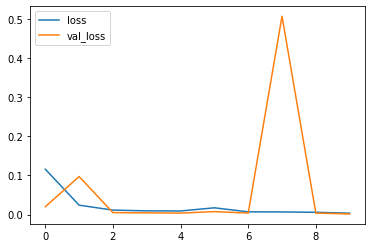

In [ ]:
df_hist[['loss','val_loss']].plot()

Plottiamo l'andamento della Accuracy (train e validation)

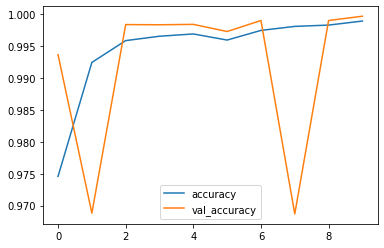

In [ ]:
df_hist[['accuracy','val_accuracy']].plot()

Valutiamo, quindi, il modello sul test set, ovvero sui dati che non ha mai visto

In [ ]:
model_r.evaluate(x_test,y_test)

6434/6434 [==============================] - 80s 12ms/step - loss: 0.0017 - accuracy: 0.9997


[0.0016518692718818784, 0.999664843082428]

Al fine di ottenere precision,recall ed F1 score, creiamo delle prediction, per poi rendere effettive quelle che hanno una probabilità maggiore del threshold di 0.6

In [ ]:
prediction = model_r.predict(x_test)

In [ ]:
y_test.shape

(205877, 10)

In [ ]:
predictions = (prediction > 0.6).astype('int')

In [ ]:
y_test.values.argmax(axis=1)

array([6, 6, 6, ..., 6, 6, 6])

In [ ]:
predictions.shape

(205877, 10)

Rendiamo categorical la variabile prediction

In [ ]:
prediction = to_categorical(prediction)

Calcoliamo le metriche di riferimento.

In [ ]:
precision_score(y_test,predictions,average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9998684812374561

In [ ]:
recall_score(y_test,predictions,average='weighted')

0.9992374087440559

In [ ]:
f1_score(y_test,predictions,average='weighted')

0.9995439106763097

Qui è possibile vedere i valori di Loss ed accuracy per train e test nella storia del fit

In [ ]:
df_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.116001,0.974575,0.020109,0.993664
1,0.024134,0.992452,0.097227,0.968806
2,0.011573,0.995875,0.005129,0.998392
3,0.009666,0.996563,0.004584,0.998359
4,0.009364,0.996920,0.003932,0.998424


In [ ]:
model_r.save('newweights.h5py')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: newweights.h5py/assets


In [ ]:
!ls -llha newweights.h5py

total 5.4M
drwxr-xr-x 4 root root 4.0K Jul 28 20:21 .
drwxr-xr-x 1 root root 4.0K Jul 28 20:21 ..
drwxr-xr-x 2 root root 4.0K Jul 28 20:21 assets
-rw-r--r-- 1 root root 5.4M Jul 28 20:21 saved_model.pb
drwxr-xr-x 2 root root 4.0K Jul 28 20:21 variables


In [ ]:
!cp -r ./newweights.h5py/ ./drive/My\ Drive/research/

## Confusion Matrix e Classification report

Al fine di valutare il nostro modello, andiamo a plottare la confusion matrix ed il classification report. Al fine di valutare la Confusion matrix, usiamo una heatmap presa dalla libreria seaborn.

### Confusion Matrix

In [ ]:
y_test.sum()

attack_cat_Analysis             218
attack_cat_Backdoor             198
attack_cat_DoS                  566
attack_cat_Exploits            2760
attack_cat_Fuzzers             2180
attack_cat_Generic             2538
attack_cat_Normal            195914
attack_cat_Reconnaissance      1335
attack_cat_Shellcode            151
attack_cat_Worms                 17
dtype: int64

In [ ]:
conf = multilabel_confusion_matrix(y_test,predictions)

In [ ]:
conf

array([[[205656,      3],
        [     0,    218]],

       [[205679,      0],
        [     2,    196]],

       [[205311,      0],
        [    47,    519]],

       [[203116,      1],
        [     3,   2757]],

       [[203694,      3],
        [    87,   2093]],

       [[203336,      3],
        [     0,   2538]],

       [[  9963,      0],
        [     0, 195914]],

       [[204542,      0],
        [     0,   1335]],

       [[205726,      0],
        [     1,    150]],

       [[205860,      0],
        [    17,      0]]])

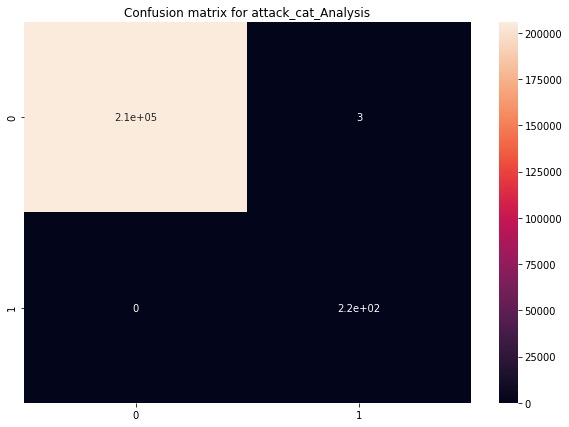

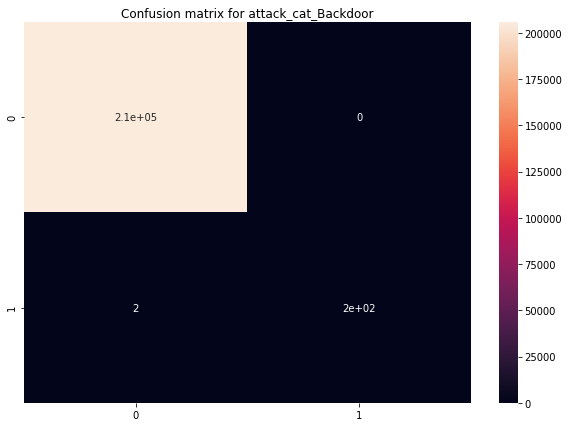

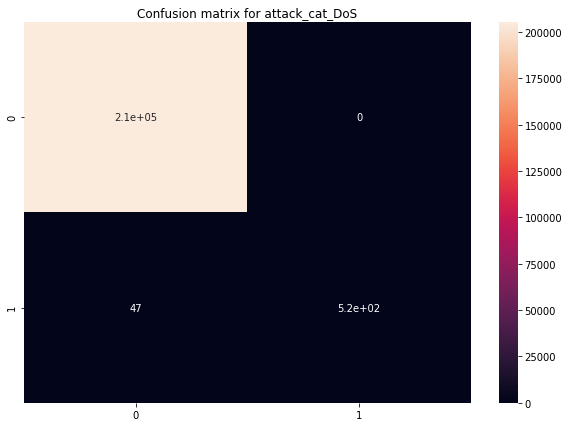

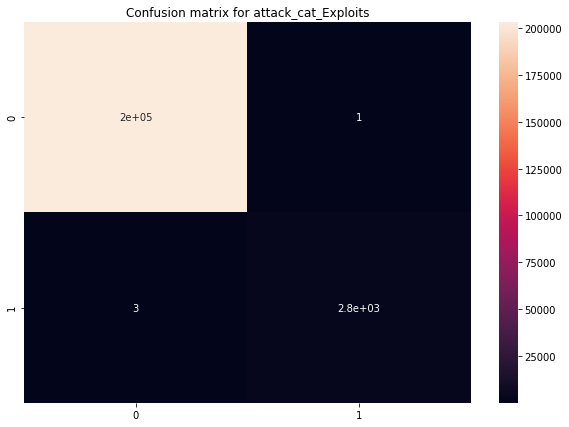

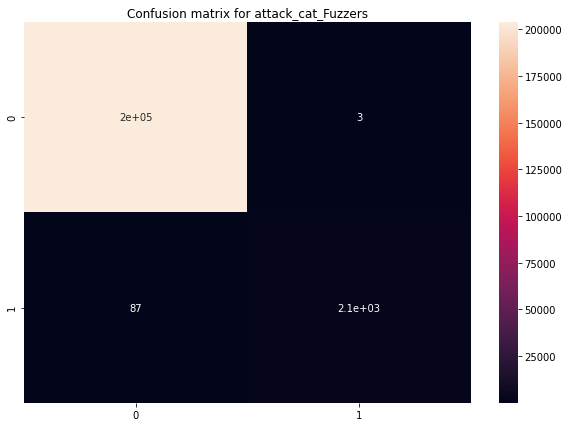

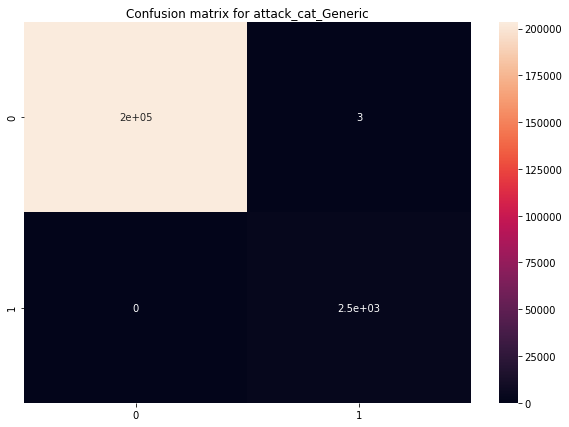

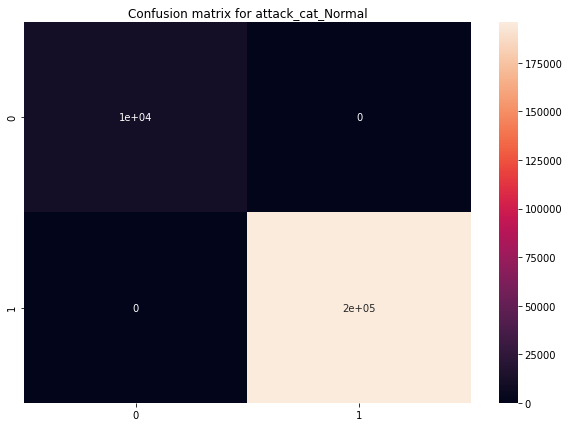

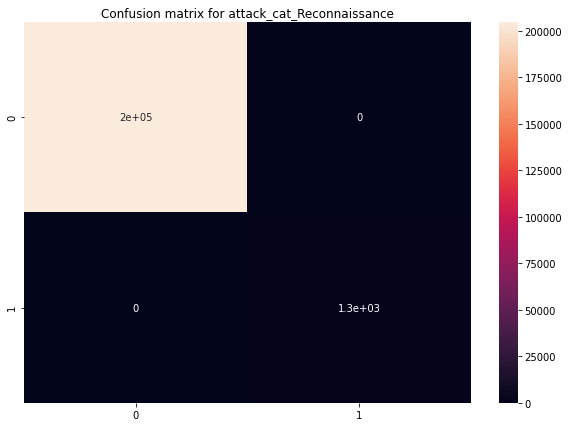

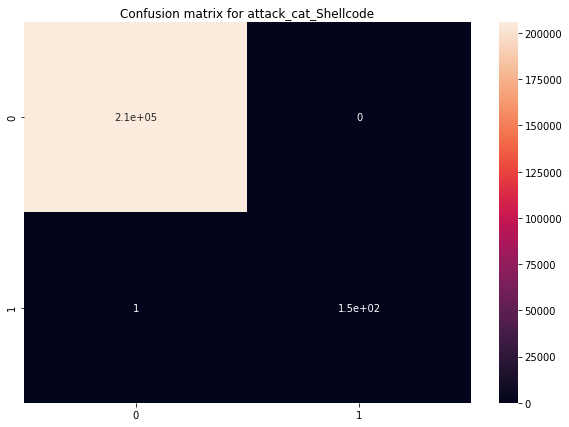

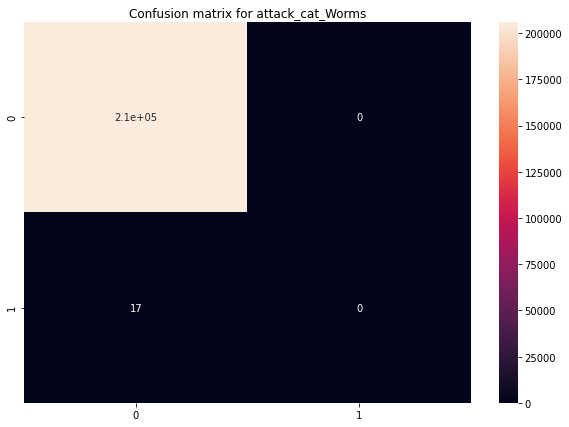

In [ ]:
for i in list(range(len(conf))):
    plt.figure(figsize = (10,7))
    sns.heatmap(conf[i], annot=True)
    plt.title("Confusion matrix for {}".format(y_test.columns[i]))
    plt.show()

### Classification report

Qui, invece, andiamo a pubblicare il classification report, in modo da vedere ove maggiormente si hanno misclassification in termini di singole classi.

In [ ]:
print(classification_report(y_test,predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.05      0.01      0.02       218\n           1       0.97      0.98      0.97       198\n           2       1.00      0.93      0.96       566\n           3       1.00      1.00      1.00      2760\n           4       1.00      1.00      1.00      2180\n           5       1.00      1.00      1.00      2538\n           6       1.00      1.00      1.00    195914\n           7       0.93      1.00      0.97      1335\n           8       0.99      1.00      1.00       151\n           9       0.00      0.00      0.00        17\n\n   micro avg       1.00      1.00      1.00    205877\n   macro avg       0.79      0.79      0.79    205877\nweighted avg       1.00      1.00      1.00    205877\n samples avg       1.00      1.00      1.00    205877\n'

# Conclusioni

La rete da noi creata si dimostra molto efficace nella distinzione del traffico anomalo da quello normale. Inoltre, grazie alla multiclass classification, abbiamo ottenuto ottime prestazioni anche in termini di Precision e Recall nella identificazione di differenti tipi di attacco. Di seguito si riporta una tabella sintetica.
<br>

method | Accuracy | Precision|Recall|F1 Score|Training Time per epoch (sec)
---|---|---|---|---|---|
ports as integer|0.9967|0.9998|0.9992|0.9995|825| 

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame({'am':[1.2,3.4,5.6],'bm':[2.4,6.8,10.12],'aM':[3.2,6.4,8.6],'bM':[8.4,9.8,20.12],'label':[0,1,1,]})

In [ ]:
data

,am,bm,aM,bM,label
0,1.2,2.40,3.2,8.40,0
1,3.4,6.80,6.4,9.80,1
2,5.6,10.12,8.6,20.12,1


In [ ]:
data['xcenter'],data['ycenter'] = (data.loc[data.label==1,'am']+data.loc[data.label==1,'aM'])/2, (data.loc[data.label==1,'bm']+data.loc[data.label==1,'bM'])/2

In [ ]:
data = data[data.label==1]
display(data)

,am,bm,aM,bM,label,acen,xcenter,ycenter
1,3.4,6.80,6.4,9.80,1,8.30,4.9,8.30
2,5.6,10.12,8.6,20.12,1,15.12,7.1,15.12


In [ ]:
data.to_json(orient='records')

'[{"am":3.4,"bm":6.8,"aM":6.4,"bM":9.8,"label":1,"acen":8.3,"xcenter":4.9,"ycenter":8.3},{"am":5.6,"bm":10.12,"aM":8.6,"bM":20.12,"label":1,"acen":15.12,"xcenter":7.1,"ycenter":15.12}]'

In [ ]:
live_features = df_tournament.drop(['target', 'data_type', 'id', 'era'], axis = 1)
predictions = model.predict(live_features)


In [ ]:
predictios = np.argmax(predictions)

In [ ]:

predictions_df = df_tournament["id"].to_frame()
predictions_df["prediction"] = predictions
predictions_df.head()

,id,prediction
1660502,n0008d97df83f66a,0.526073
1660503,n000d4fb35504d2b,0.486598
1660504,n001632581bd1b13,0.500613
1660505,n001fc2b511f75ea,0.528576
1660506,n00269a73142d4ff,0.488711


In [ ]:
predictions_df.to_csv("predictions1.csv", index=False)